In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
df = pd.read_csv("Geospatial_dataset_PRJ.csv", encoding="latin1")

In [112]:
print(df)

    ISO_Code               Country    Population  Blood_Group_O_Positive (%)  \
0        ALB               Albania  3.074579e+06                       34.10   
1        ARE  United Arab Emirates  9.992083e+06                       44.10   
2        ARG             Argentina  4.547912e+07                       50.34   
3        ARM               Armenia  3.021324e+06                       29.00   
4        AUS             Australia  2.546646e+07                       38.00   
..       ...                   ...           ...                         ...   
121      VNM               Vietnam  9.872128e+07                       41.70   
122      WRD                 World  7.772851e+09                       38.40   
123      YEM                 Yemen  2.988440e+07                       47.84   
124      ZAF          South Africa  5.646362e+07                       39.00   
125      ZWE              Zimbabwe  1.454631e+07                       36.40   

     Blood_Group_A_Positive(%)  Blood_G

In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset
data = pd.read_csv("Geospatial_dataset_PRJ.csv", encoding="latin1")

data.ffill(inplace=True)  # This will fill forward missing values

# Feature selection: Choose your features and target
features = data[['Population', 'Centroid_Lat', 'Centroid_Lon']]  # replace with actual feature names
target = data['Blood_Group_O_Positive (%)']  

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features (important for algorithms like Linear Regression and Gradient Boosting)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [114]:
df.columns

Index(['ISO_Code', 'Country', 'Population', 'Blood_Group_O_Positive (%)',
       'Blood_Group_A_Positive(%)', 'Blood_Group_B_Positive%',
       'Blood_Group_AB_Positive (%)', 'Blood_Group_O_Negative( %)',
       'Blood_Group_A_Negative( %)', 'Blood_Group_B_Negative (%)',
       'Blood_Group_AB_Negative (%)', 'Centroid_Lat', 'Centroid_Lon',
       'Area_sq_km', 'Pop_Density (per km²)', 'GDP_per_capita (USD)',
       'Median_Age', 'Literacy_Rate (%)', 'Healthcare_Index',
       'Urbanization(%) '],
      dtype='object')

In [115]:
pip install xgboost

  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 262.6 kB/s eta 0:09:3

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\user\Downloads\ANACONDA\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\user\Downloads\ANACONDA\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\Downloads\ANACONDA\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\Downloads\ANACONDA\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\Downloads\ANACONDA\Lib\http\client.py", line 473, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "C:\Users\user\Downloads\ANACONDA\Lib\socket.py", line 706, in readinto

    --------------------------------------- 2.2/150.0 MB 12.0 kB/s eta 3:25:48
    --------------------------------------- 2.2/150.0 MB 12.0 kB/s eta 3:25:48
    --------------------------------------- 2.2/150.0 MB 12.0 kB/s eta 3:25:48
    --------------------------------------- 2.2/150.0 MB 12.0 kB/s eta 3:25:48
    --------------------------------------- 2.2/150.0 MB 12.0 kB/s eta 3:25:48
    --------------------------------------- 2.2/150.0 MB 12.0 kB/s eta 3:25:48
    --------------------------------------- 2.2/150.0 MB 12.0 kB/s eta 3:25:48
    --------------------------------------- 2.2/150.0 MB 12.0 kB/s eta 3:25:48
    --------------------------------------- 2.2/150.0 MB 12.0 kB/s eta 3:25:48
    --------------------------------------- 2.2/150.0 MB 12.0 kB/s eta 3:25:48
    --------------------------------------- 2.2/150.0 MB 12.0 kB/s eta 3:25:48
    --------------------------------------- 2.2/150.0 MB 12.0 kB/s eta 3:25:48
    --------------------------------------- 2.2/150.

In [138]:
import xgboost as xgb

# Initialize and train the model
xg_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xg_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xg = xg_model.predict(X_test_scaled)

# Evaluate the model
mse_xg = mean_squared_error(y_test, y_pred_xg)
rmse_xg = mse_xg ** 0.5
r2_xg = r2_score(y_test, y_pred_xg)

print(f"XGBoost RMSE: {rmse_xg}")
print(f"XGBoost R^2: {r2_xg}")

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune (remove learning_rate for RandomForestRegressor)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
}

# Initialize GridSearchCV for RandomForest
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score (RMSE):", (-grid_search.best_score_) ** 0.5)


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming your features are in 'features' and the target variable is in 'target'
X = features  # Features
y = target    # Target variable

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model using the training set
rf_model.fit(X_train, y_train)

# Print a message indicating that the model has been trained
print("Model has been trained!")


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predict using the test set
y_pred = rf_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Perform k-fold cross-validation (e.g., 5 folds)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to RMSE
cv_rmse_scores = np.sqrt(-cv_scores)

# Print the RMSE for each fold
print("Cross-validation RMSE scores for each fold:", cv_rmse_scores)

# Calculate the mean and standard deviation of the RMSE scores
print(f"Mean RMSE: {cv_rmse_scores.mean()}")
print(f"Standard Deviation of RMSE: {cv_rmse_scores.std()}")


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model with your training data
rf_model.fit(X_train, y_train)


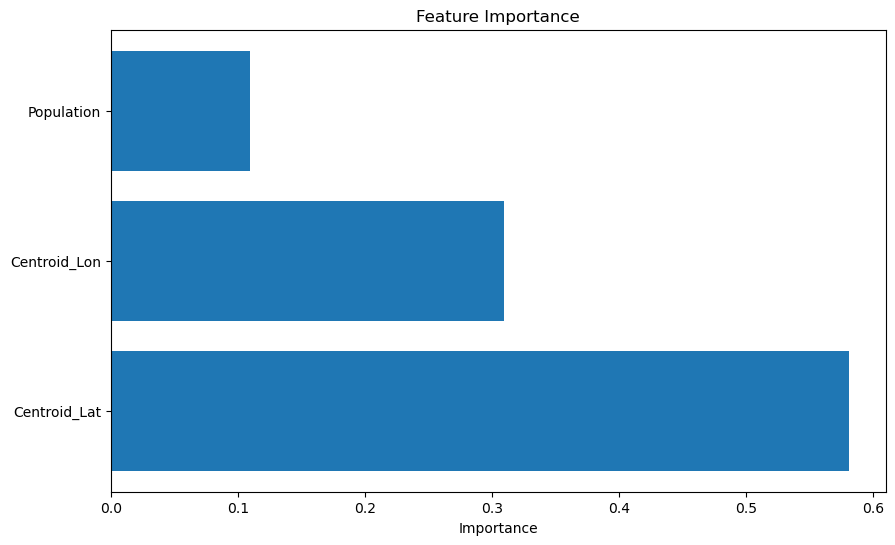

In [128]:
# Get the feature importance scores
feature_importances = rf_model.feature_importances_

# Get the feature names (assuming you have column names for X_train)
feature_names = X_train.columns

# Create a DataFrame to display feature importance
import pandas as pd

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


In [130]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


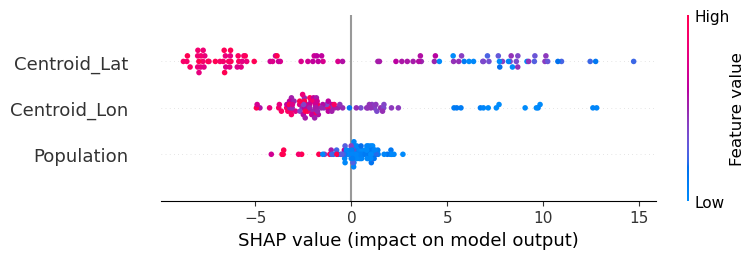

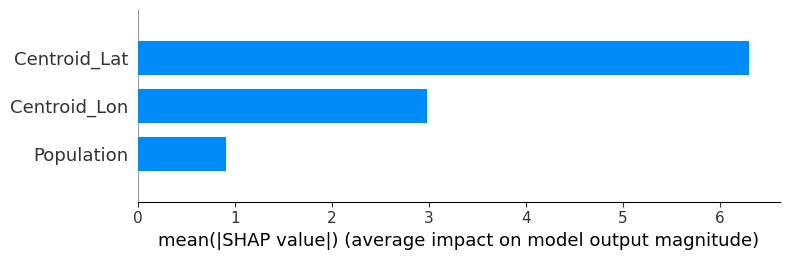

In [131]:
import shap

# Initialize SHAP explainer
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values for the training set
shap_values = explainer.shap_values(X_train)

# Create summary plot of SHAP values for global interpretation
shap.summary_plot(shap_values, X_train)

# Create a bar plot to show feature importance according to SHAP
shap.summary_plot(shap_values, X_train, plot_type="bar")


In [136]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define model
rf = RandomForestRegressor()

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
MSE: 38.87953065615401


In [140]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import scipy.stats as st

# Define model
xgb = XGBRegressor()

# Define hyperparameter space
param_dist = {
    'n_estimators': st.randint(100, 500),
    'learning_rate': st.uniform(0.01, 0.3),
    'max_depth': st.randint(3, 10),
    'subsample': st.uniform(0.5, 1),
    'colsample_bytree': st.uniform(0.5, 1)
}

# Perform Random Search
random_search = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Evaluate best model
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))


ModuleNotFoundError: No module named 'xgboost'

In [142]:
pip install xgboost


  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\user\Downloads\ANACONDA\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\user\Downloads\ANACONDA\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\Downloads\ANACONDA\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\Downloads\ANACONDA\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\Downloads\ANACONDA\Lib\http\client.py", line 473, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "C:\Users\user\Downloads\ANACONDA\Lib\socket.py", line 706, in readinto

   - -------------------------------------- 7.3/150.0 MB 15.3 kB/s eta 2:35:48
   - -------------------------------------- 7.3/150.0 MB 15.3 kB/s eta 2:35:48
   - -------------------------------------- 7.3/150.0 MB 15.3 kB/s eta 2:35:48
   - -------------------------------------- 7.3/150.0 MB 15.3 kB/s eta 2:35:48
   - -------------------------------------- 7.3/150.0 MB 15.3 kB/s eta 2:35:48
   - -------------------------------------- 7.3/150.0 MB 15.3 kB/s eta 2:35:48
   - -------------------------------------- 7.3/150.0 MB 15.3 kB/s eta 2:35:48
   - -------------------------------------- 7.3/150.0 MB 15.3 kB/s eta 2:35:48
   - -------------------------------------- 7.3/150.0 MB 15.3 kB/s eta 2:35:48
   - -------------------------------------- 7.3/150.0 MB 15.3 kB/s eta 2:35:48
   - -------------------------------------- 7.3/150.0 MB 15.3 kB/s eta 2:35:48
   - -------------------------------------- 7.3/150.0 MB 15.3 kB/s eta 2:35:48
   - -------------------------------------- 7.3/150.

In [149]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Get predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 5.14
MSE: 38.88
RMSE: 6.24
R² Score: 0.52


C:\Users\user\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


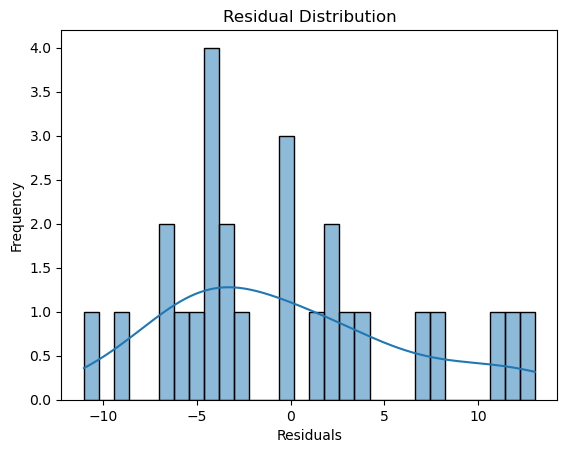

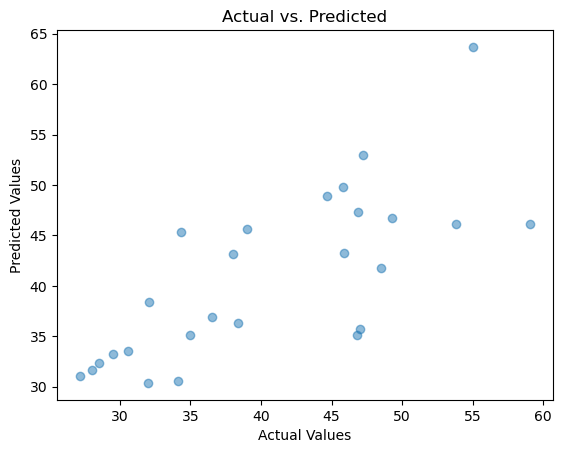

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute residuals
residuals = y_test - y_pred

# Plot residual distribution
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

# Scatter plot (Actual vs Predicted)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.show()


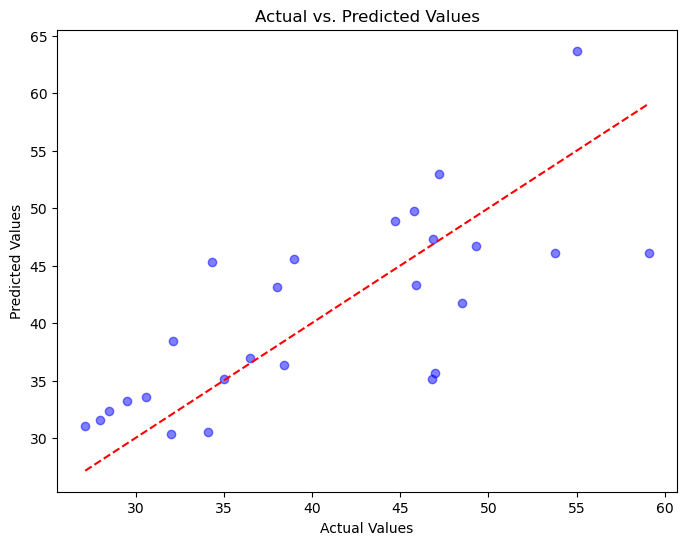

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # 45-degree reference line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


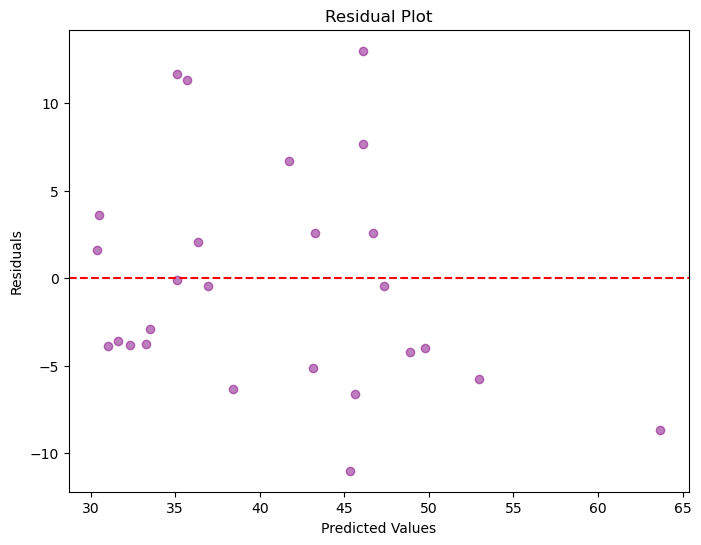

In [153]:
# Compute residuals
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color="purple")
plt.axhline(y=0, color='red', linestyle="--")  # Zero reference line
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


C:\Users\user\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


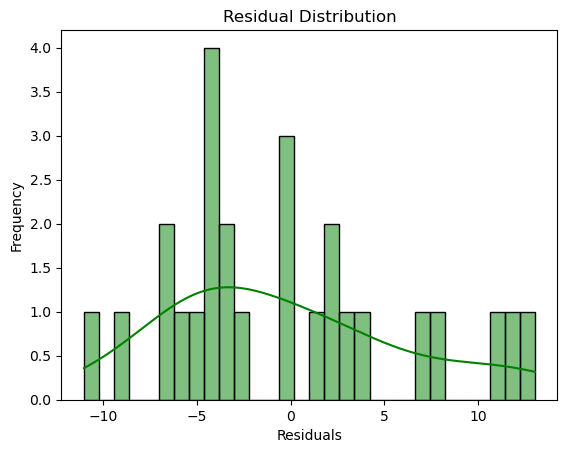

In [155]:
sns.histplot(residuals, bins=30, kde=True, color="green")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()


In [199]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib  # For loading trained model
import plotly.express as px

# Load trained model
model = joblib.load("blood_group_predictor.pkl")  # Ensure you have a trained model saved

# Define UI
st.title("🔬 Blood Group Distribution Predictor")
st.markdown("Enter demographic details to predict blood group distribution.")

# User inputs for demographic features
age = st.slider("Age", 0, 100, 30)
income = st.number_input("Annual Income (USD)", min_value=500, max_value=100000, value=20000, step=500)
education = st.selectbox("Education Level", ["No Formal Education", "Primary", "Secondary", "Tertiary"])
region = st.selectbox("Region", ["North", "South", "East", "West"])

# Convert categorical data to numerical
education_mapping = {"No Formal Education": 0, "Primary": 1, "Secondary": 2, "Tertiary": 3}
region_mapping = {"North": 0, "South": 1, "East": 2, "West": 3}

# Create input DataFrame
input_data = pd.DataFrame({
    "Age": [age],
    "Income": [income],
    "Education": [education_mapping[education]],
    "Region": [region_mapping[region]]
})

# Predict blood group distribution
if st.button("Predict Blood Group Distribution"):
    predictions = model.predict(input_data)[0]
    blood_groups = ["A", "B", "AB", "O"]
    pred_df = pd.DataFrame({"Blood Group": blood_groups, "Percentage": predictions})
    
    # Display results as a bar chart
    fig = px.bar(pred_df, x="Blood Group", y="Percentage", title="Predicted Blood Group Distribution", 
                 labels={"Percentage": "Predicted %"}, color="Blood Group")
    st.plotly_chart(fig)
    
    # Show data in table
    st.write("### Prediction Breakdown:")
    st.dataframe(pred_df)
    
    # Allow stakeholders to download predictions
    csv = pred_df.to_csv(index=False)
    st.download_button(label="Download Results", data=csv, file_name="blood_group_predictions.csv", mime="text/csv")

st.markdown("---")
st.markdown("*Developed by Khadijat Oluwakemi Mashood*")


DeltaGenerator()

In [161]:
import joblib
from sklearn.ensemble import RandomForestRegressor  # Example model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Sample dataset (replace with your actual dataset)
data = pd.DataFrame({
    "Age": [25, 40, 60, 30, 45, 50, 35],
    "Income": [20000, 50000, 70000, 30000, 60000, 40000, 25000],
    "Education": ["Secondary", "Tertiary", "Tertiary", "Primary", "Secondary", "No Formal Education", "Tertiary"],
    "Region": ["North", "South", "East", "West", "North", "South", "West"],
    "A": [20, 30, 25, 15, 22, 18, 24],
    "B": [30, 20, 35, 40, 28, 25, 30],
    "AB": [10, 20, 15, 10, 12, 15, 10],
    "O": [40, 30, 25, 35, 38, 42, 36]
})

# Encode categorical features
education_mapping = {"No Formal Education": 0, "Primary": 1, "Secondary": 2, "Tertiary": 3}
region_mapping = {"North": 0, "South": 1, "East": 2, "West": 3}
data["Education"] = data["Education"].map(education_mapping)
data["Region"] = data["Region"].map(region_mapping)

# Define features and target variables
X = data[["Age", "Income", "Education", "Region"]]
y = data[["A", "B", "AB", "O"]]  # Multi-output regression

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save model
joblib.dump(model, "blood_group_predictor.pkl")

print("Model saved as 'blood_group_predictor.pkl' ✅")


Model saved as 'blood_group_predictor.pkl' ✅


In [177]:
import os
print("File exists:", os.path.exists("blood_group_predictor.pkl"))


File exists: True


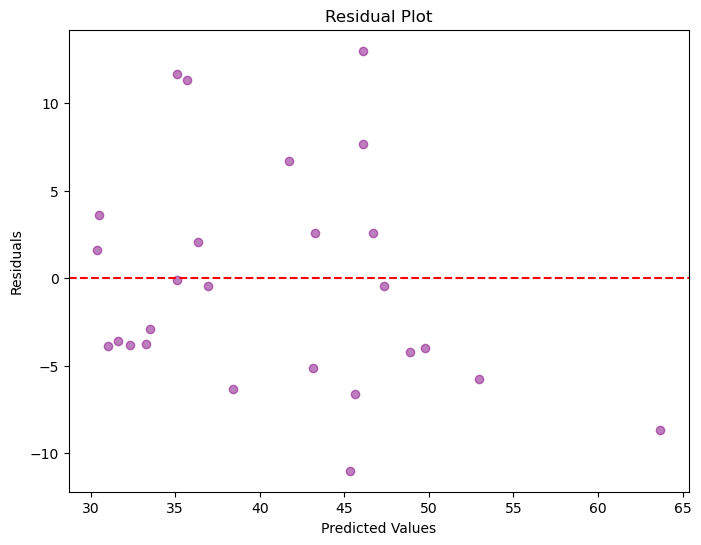

In [197]:
# Compute residuals
y_pred = y_pred.reshape(-1)


# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color="purple")
plt.axhline(y=0, color='red', linestyle="--")  # Zero reference line
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
